In [1]:
from utz import *

import plotly.express as px
import plotly.graph_objects as go

import sys
sys.executable

'/opt/homebrew/Caskroom/mambaforge/base/envs/geopandas/bin/python'

## Mapbox configs

In [2]:
token = open(".mapbox-token").read()

osm = dict(mapbox=dict(style="open-street-map"))
usgs = dict(mapbox=dict(
    style="white-bg",
    layers=[{
        "below": 'traces',
        "sourcetype": "raster",
        "sourceattribution": "United States Geological Survey",
        "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
    }],
))
stadia = dict(
    mapbox=dict(
        style="dark",
        accesstoken=token,
        layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": '© <a href="https://stadiamaps.com/">Stadia Maps</a>, © <a href="https://openmaptiles.org/">OpenMapTiles</a> &copy; <a href="http://openstreetmap.org">OpenStreetMap</a> contributors',
            "source": ['https://tiles.stadiamaps.com/tiles/alidade_smooth_dark/{z}/{x}/{y}{r}.png'],
        }],
    )
)
mapbox = dict(mapbox=dict(
    style="dark",
    accesstoken=token,
))

## NJDOT 2021 Crash SRIs/MPs

In [3]:
%%time
from nj_crashes.crashes import load, Crashes
c21 = Crashes.load(years=2021)
c21

CPU times: user 448 ms, sys: 87.8 ms, total: 536 ms
Wall time: 487 ms


,County Code,Municipality Code,Department Case Number,County Name,Municipality Name,Police Department Code,Police Department,Police Station,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Severity,Intersection,Alcohol Involved,HazMat Involved,Crash Type Code,Total Vehicles Involved,Crash Location,Location Direction,Route,Route Suffix,sri,mp,Road System,Road Character,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environmental Condition,Road Divided By,Temporary Traffic Control Zone,Distance To Cross Street,Unit Of Measurement,Direction From Cross Street,Cross Street Name,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,First Harmful Event,lat,lon,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.,Date
0,01,01,I-2020-005843,ATLANTIC,ABSECON CITY,01,ABSECON CITY PD,,0,1,0,0,Injury,B,False,False,11,1,US 30,E,30,,00000030__,53.89,02,,01,04,02,01,03,01,01,01,1056,FE,W,CR 646 / DELILAH RD,,,,50,25,54,NaN,NaN,N,CROSS PUSH BUTTON POLE TWO METAL ELECTRICAL C...,858,2021-03-21 19:14:00
1,01,01,I-2021-000001,ATLANTIC,ABSECON CITY,01,ABSECON CITY PD,,0,0,0,0,Property Damage,B,False,False,11,1,US 30,E,30,,00000030__,50.80,02,,03,04,02,01,06,01,01,01,175,FE,,,T,HADDON AVE,NB,45,,56,NaN,NaN,N,,846,2021-01-01 00:00:00
2,01,01,I-2021-000042,ATLANTIC,ABSECON CITY,01,ABSECON CITY PD,ABSECON,0,3,0,0,Injury,B,False,False,11,1,ATLANTIC COUNTY 646 II,,646,2,010006462_,0.13,05,,02,06,02,02,06,02,05,01,500,FE,W,US 30 / WHITE HORSE PIKE,,,,35,50,46,NaN,NaN,N,,854,2021-01-02 02:14:00
3,01,01,I-2021-000315,ATLANTIC,ABSECON CITY,01,ABSECON CITY PD,,0,0,0,0,Property Damage,B,False,False,11,1,US 30,W,30,,00000030__,53.59,02,,01,04,02,01,01,05,01,01,2640,FE,W,CR 646 / DELILAH RD,,,,50,25,48,NaN,NaN,N,,848,2021-01-05 14:08:00
4,01,01,I-2021-000527,ATLANTIC,ABSECON CITY,01,ABSECON CITY PD,,0,0,0,0,Property Damage,I,False,False,03,2,US 9,,9,,00000009__,42.74,02,,01,04,02,01,01,01,05,01,,AT,,CR 630 / OHIO AVE,,,,35,35,26,NaN,NaN,N,,866,2021-01-07 15:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226953,21,23,B150-2021-00117A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,Property Damage,I,False,False,11,1,WARREN COUNTY 620,N,620,,21000620__,0.00,05,,02,04,02,01,06,01,05,01,,AT,,ROUTE 519 / S BRIDGEVILLE RD,,,,50,50,46,40.80707,-75.07559,N,Damage to 10ft of Country road guardrail.,7837,2021-05-26 21:08:00
226954,21,23,B150-2021-00118A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,Property Damage,I,False,False,01,2,MANUNKA CHUNK RD / UPPER SEREPTA RD **,W,,,21231034__,1.73,07,,01,04,02,01,01,01,05,01,,AT,,MASSENATTS RD,,,,40,50,26,40.84466,-75.05549,N,,8610,2021-05-25 07:26:00
226955,21,23,B150-2021-00128A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,Property Damage,B,False,False,12,1,ROUTE 519,S,519,,00000519__,44.00,05,,03,04,02,02,05,04,05,01,,,,,,,,50,,24,40.80564,-75.07627,N,,8514,2021-06-03 20:17:00
226956,21,23,B150-2021-00130A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,Property Damage,B,False,False,12,1,US 46,E,46,,00000046__,7.50,02,,01,04,02,01,07,01,05,01,,,,,,,,50,,24,40.84149,-75.04968,N,,8365,2021-06-06 00:00:00


In [4]:
(~c21.lat.isna()).sum()

74103

In [5]:
%%time
c21ll = c21.lls
c21ll

CPU times: user 12.4 s, sys: 174 ms, total: 12.5 s
Wall time: 12.7 s


lat: 127774 recovered (56%), 152855 missing (67%), 191520 interpolated (84%), 201877 total lls (88%)
lon: 127774 recovered (56%), 152855 missing (67%), 191520 interpolated (84%), 201877 total lls (88%)


,County Code,Municipality Code,Department Case Number,County Name,Municipality Name,Police Department Code,Police Department,Police Station,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Severity,Intersection,Alcohol Involved,HazMat Involved,Crash Type Code,Total Vehicles Involved,Crash Location,Location Direction,Route,Route Suffix,sri,mp,Road System,Road Character,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environmental Condition,Road Divided By,Temporary Traffic Control Zone,Distance To Cross Street,Unit Of Measurement,Direction From Cross Street,Cross Street Name,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,First Harmful Event,lat,lon,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.,Date
0,01,01,I-2020-005843,ATLANTIC,ABSECON CITY,01,ABSECON CITY PD,,0,1,0,0,Injury,B,False,False,11,1,US 30,E,30,,00000030__,53.89,02,,01,04,02,01,03,01,01,01,1056,FE,W,CR 646 / DELILAH RD,,,,50,25,54,39.398973,-74.492469,N,CROSS PUSH BUTTON POLE TWO METAL ELECTRICAL C...,858,2021-03-21 19:14:00
1,01,01,I-2021-000001,ATLANTIC,ABSECON CITY,01,ABSECON CITY PD,,0,0,0,0,Property Damage,B,False,False,11,1,US 30,E,30,,00000030__,50.80,02,,03,04,02,01,06,01,01,01,175,FE,,,T,HADDON AVE,NB,45,,56,39.435744,-74.516528,N,,846,2021-01-01 00:00:00
2,01,01,I-2021-000042,ATLANTIC,ABSECON CITY,01,ABSECON CITY PD,ABSECON,0,3,0,0,Injury,B,False,False,11,1,ATLANTIC COUNTY 646 II,,646,2,010006462_,0.13,05,,02,06,02,02,06,02,05,01,500,FE,W,US 30 / WHITE HORSE PIKE,,,,35,50,46,39.394830,-74.491217,N,,854,2021-01-02 02:14:00
3,01,01,I-2021-000315,ATLANTIC,ABSECON CITY,01,ABSECON CITY PD,,0,0,0,0,Property Damage,B,False,False,11,1,US 30,W,30,,00000030__,53.59,02,,01,04,02,01,01,05,01,01,2640,FE,W,CR 646 / DELILAH RD,,,,50,25,48,39.403345,-74.492177,N,,848,2021-01-05 14:08:00
4,01,01,I-2021-000527,ATLANTIC,ABSECON CITY,01,ABSECON CITY PD,,0,0,0,0,Property Damage,I,False,False,03,2,US 9,,9,,00000009__,42.74,02,,01,04,02,01,01,01,05,01,,AT,,CR 630 / OHIO AVE,,,,35,35,26,39.426459,-74.506329,N,,866,2021-01-07 15:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226953,21,23,B150-2021-00117A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,Property Damage,I,False,False,11,1,WARREN COUNTY 620,N,620,,21000620__,0.00,05,,02,04,02,01,06,01,05,01,,AT,,ROUTE 519 / S BRIDGEVILLE RD,,,,50,50,46,40.807070,-75.075590,N,Damage to 10ft of Country road guardrail.,7837,2021-05-26 21:08:00
226954,21,23,B150-2021-00118A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,Property Damage,I,False,False,01,2,MANUNKA CHUNK RD / UPPER SEREPTA RD **,W,,,21231034__,1.73,07,,01,04,02,01,01,01,05,01,,AT,,MASSENATTS RD,,,,40,50,26,40.844660,-75.055490,N,,8610,2021-05-25 07:26:00
226955,21,23,B150-2021-00128A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,Property Damage,B,False,False,12,1,ROUTE 519,S,519,,00000519__,44.00,05,,03,04,02,02,05,04,05,01,,,,,,,,50,,24,40.805640,-75.076270,N,,8514,2021-06-03 20:17:00
226956,21,23,B150-2021-00130A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,Property Damage,B,False,False,12,1,US 46,E,46,,00000046__,7.50,02,,01,04,02,01,07,01,05,01,,,,,,,,50,,24,40.841490,-75.049680,N,,8365,2021-06-06 00:00:00


In [6]:
%%time
nj = c21ll.nj
nnj = c21ll.nnj
len(nj), len(nnj)

Loading tlgdb_2022_a_34_nj.gdb/


CPU times: user 40.6 s, sys: 607 ms, total: 41.2 s
Wall time: 41.3 s


(201378, 499)

In [7]:
nnj

,County Code,Municipality Code,Department Case Number,County Name,Municipality Name,Police Department Code,Police Department,Police Station,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Severity,Intersection,Alcohol Involved,HazMat Involved,Crash Type Code,Total Vehicles Involved,Crash Location,Location Direction,Route,Route Suffix,sri,mp,Road System,Road Character,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environmental Condition,Road Divided By,Temporary Traffic Control Zone,Distance To Cross Street,Unit Of Measurement,Direction From Cross Street,Cross Street Name,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,First Harmful Event,lat,lon,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.,Date
412,01,02,210479640,ATLANTIC,ATLANTIC CITY,02,NEW JERSEY STATE POLICE,A160,0,1,0,0,Injury,B,False,False,11,1,ATLANTIC CITY-BRIGANTINE CONNECTOR,N,446,X,00000446X_,1.20,03,,02,06,02,02,06,02,01,01,,,,,,,,35,,48,39.128519,-74.151615,N,,8239,2021-10-27 00:54:00
424,01,02,210584415,ATLANTIC,ATLANTIC CITY,02,NEW JERSEY STATE POLICE,A160,0,0,0,0,Property Damage,B,False,False,02,2,ATLANTIC CITY-BRIGANTINE CONNECTOR,N,446,X,00000446X_,1.70,03,,02,04,02,01,06,01,02,01,,,,,,,,35,,26,39.178116,-74.529558,N,,8239,2021-11-27 21:08:00
444,01,02,21R146531,ATLANTIC,ATLANTIC CITY,02,NEW JERSEY STATE POLICE,A160,0,2,0,0,Injury,B,True,False,11,1,ATLANTIC CITY-BRIGANTINE CONNECTOR,N,446,X,00000446X_,0.40,03,,03,06,02,01,06,01,01,01,,,,,T,BACHARACH BLVD,EB,35,,46,39.594294,-75.799554,N,MAJOR GUARDRAIL DAMAGE ON EXIT B RAMP OWNED BY...,8207,2021-07-20 02:03:00
490,01,03,A160-2021-00038A,ATLANTIC,BRIGANTINE CITY,02,NEW JERSEY STATE POLICE,ATLANTIC CITY E,0,0,0,0,Property Damage,B,False,False,15,2,NJ 87,S,87,,00000087__,1.60,02,,01,04,02,01,01,01,01,04,,,,,,,,45,,39,39.561280,-73.827280,N,,8179,2021-01-22 08:03:00
493,01,03,I-2021-01995,ATLANTIC,BRIGANTINE CITY,01,BRIGANTINE PD,BRIGANTINE,0,0,0,0,Property Damage,I,False,False,02,2,ATLANTIC COUNTY 638,N,638,,01000638__,1.83,05,,02,04,02,01,06,01,04,01,,AT,,S 29TH ST,,,,30,25,26,39.234300,-74.230200,N,,191,2021-02-20 18:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225197,21,09,B020-2021-00072A,WARREN,HARDWICK TWP,02,NEW JERSEY STATE POLICE,HOPE - SQUAD 1,0,2,0,0,Injury,B,False,False,11,1,I-80,W,80,,00000080__,0.10,03,,01,04,02,03,01,03,01,01,,,,,,,,50,,48,40.977180,-75.135590,N,,7993,2021-01-31 13:48:00
225215,21,09,B020-2021-00289A,WARREN,HARDWICK TWP,02,NEW JERSEY STATE POLICE,HOPE - SQUAD 3,0,0,0,0,Property Damage,B,False,False,01,2,I-80,W,80,,00000080__,1.50,01,,03,04,02,01,01,01,01,01,,,,,,,,55,,26,41.615000,-74.845610,N,,8274,2021-05-15 16:56:00
225536,21,13,B020-2021-00040A,WARREN,KNOWLTON TWP,02,NEW JERSEY STATE POLICE,HOPE - SQUAD 2,0,0,0,0,Property Damage,B,False,False,02,2,I-80,W,80,,00000080__,1.60,01,,02,04,02,01,06,01,01,01,,,,,,,,55,,26,41.846510,-74.986450,N,,8274,2021-01-06 20:00:00
226431,21,20,2021-003666,WARREN,POHATCONG TWP,01,POHATCONG PD,,0,0,0,0,Property Damage,B,False,False,11,1,STILL VALLEY ROAD,N,,,,NaN,07,,01,04,02,01,01,01,05,01,1400,FE,S,EDGE ROAD,,,,25,25,55,40.365605,-75.132730,N,DAMAGE TO THE STONES IN THE RAILROAD TUNNEL ON...,18,2021-04-19 11:55:00


In [8]:
severity_map = {
    "Property Damage": "yellow",
    "Injury": "orange",
    "Fatal": "red",
}

In [19]:
from nj_crashes.geo import nj_points
from nj_crashes.utils import show
p1s = nj_points()

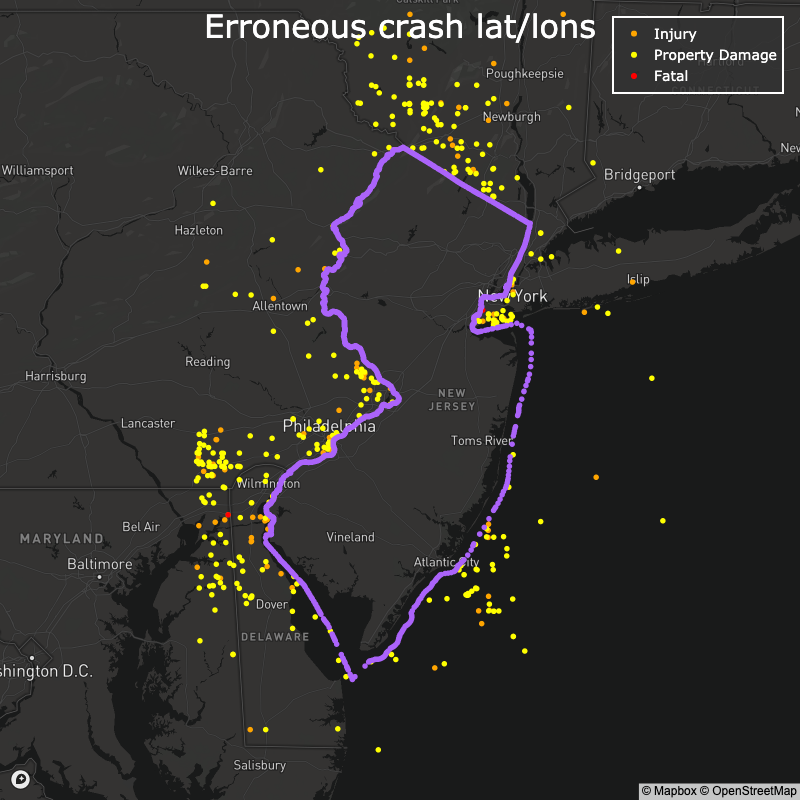

In [22]:
fig = px.scatter_mapbox(
    nnj.df,
    lat="lat", lon="lon",
    color='Severity',
    hover_data=["County Name", "Date", "Severity", "Crash Location", "sri", "mp"],
    color_discrete_map=severity_map,
    center=dict(lat=40.15, lon=-74.715),
    zoom=6.8,
    height=1000,
)
fig.add_trace(go.Scattermapbox(
    lat=p1s.lat, lon=p1s.lon,
    name='NJ',
    showlegend=False,
    #color=p1s.name,
    #hover_name="City",
    #hover_data=["name"],
))
legend_bgcolor = '50'
fig.update_layout(
    **mapbox,
    title=dict(
        text="Erroneous crash lat/lons",
        x=0.5, y=0.98,
        xanchor='center', yanchor='top',
        font=dict(size=32, color="white")
    ),
    legend=dict(
        title=dict(text=''),
        x=0.98, y=0.98,
        xanchor="right", yanchor="top",
        font=dict(
            size=14,
            color="white"
        ),
        bgcolor=f"rgba({legend_bgcolor},{legend_bgcolor},{legend_bgcolor},0.8)",
        bordercolor="white",
        borderwidth=2,
    ),
    margin={"r":0,"t":0,"l":0,"b":0},
)
show(fig, w=800, h=800)

In [11]:
c21ll[c21ll.lon > 0]

,County Code,Municipality Code,Department Case Number,County Name,Municipality Name,Police Department Code,Police Department,Police Station,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Severity,Intersection,Alcohol Involved,HazMat Involved,Crash Type Code,Total Vehicles Involved,Crash Location,Location Direction,Route,Route Suffix,sri,mp,Road System,Road Character,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environmental Condition,Road Divided By,Temporary Traffic Control Zone,Distance To Cross Street,Unit Of Measurement,Direction From Cross Street,Cross Street Name,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,First Harmful Event,lat,lon,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.,Date


In [12]:
c21ll.lon.dropna().astype(int).value_counts().sort_index()

lon
-75     21928
-74    174435
-73      5514
Name: count, dtype: int64

### Plot crashes

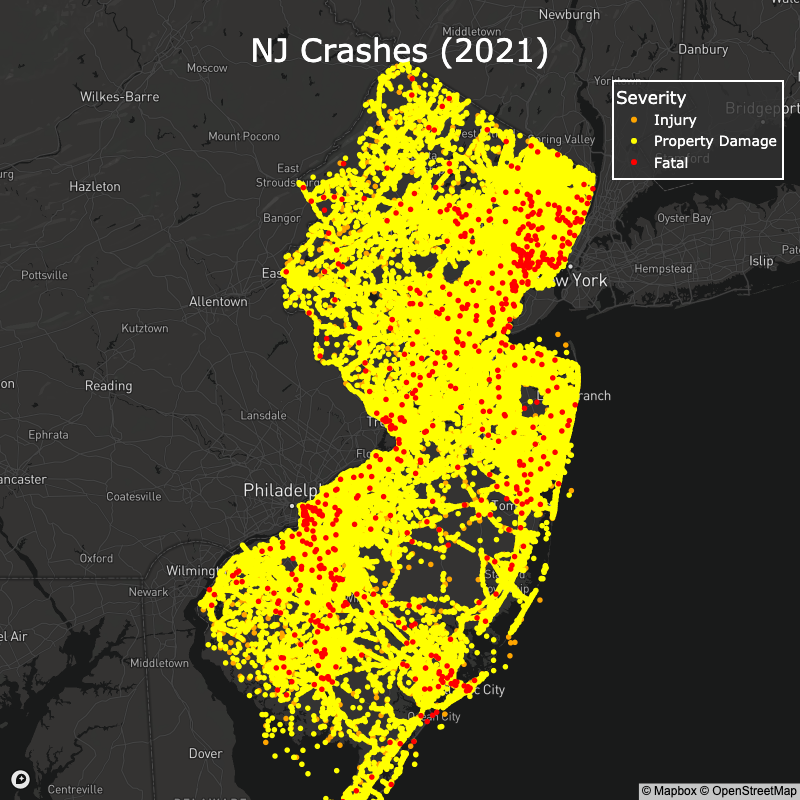

In [26]:
fig = px.scatter_mapbox(
    nj.df,
    lat="lat", lon="lon",
    color='Severity',
    #hover_name="City",
    hover_data=["County Name", "Date", "sri", "mp"],
    color_discrete_map=severity_map,
    center=dict(lat=40.29, lon=-74.715),
    zoom=7.4,
    height=1000,
)
legend_bgcolor = '50'
fig.update_layout(
    **mapbox,
    title=dict(
        text="NJ Crashes (2021)",
        x=0.5, y=0.95,
        xanchor='center', yanchor='top',
        font=dict(size=32, color="white")
    ),
    legend=dict(
        x=0.98, y=0.90,
        xanchor="right", yanchor="top",
        font=dict(
            size=14,
            color="white"
        ),
        bgcolor=f"rgba({legend_bgcolor},{legend_bgcolor},{legend_bgcolor},0.8)",
        bordercolor="white",
        borderwidth=2,
    ),
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image('nj-crashes-mapbox.png', width=800, height=1000)
fig.write_json('nj-crashes-mapbox.json')
show(fig, w=800, h=800)

In [18]:
c21ll[['lat', 'lon']].value_counts().value_counts().sort_index()

count
1      95696
2      14435
3       5630
4       2769
5       1596
6       1032
7        675
8        429
9        376
10       247
11       176
12       158
13       103
14        82
15        80
16        75
17        62
18        45
19        46
20        21
21        32
22        18
23        29
24        22
25         8
26        11
27        13
28        14
29        12
30         9
31         6
32         3
33         9
34         6
35         2
36         4
37         7
38         5
39         2
40         3
41         3
43         2
45         5
46         3
47         2
48         3
49         1
50         4
51         2
52         2
54         1
56         1
57         2
58         1
60         1
61         1
63         1
64         1
65         1
67         1
68         1
69         1
72         1
84         1
85         2
100        1
104        1
109        1
116        1
119        1
593        1
Name: count, dtype: int64